# ドル円 為替レート 15分足

### 一つ上のディレクトリをパスに追加

In [16]:
import sys
path_up = '..'
if not path_up in sys.path:
    sys.path.append(path_up)

### ライブラリをここで一括インポート

In [17]:
import datetime

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import yfinance as yf

from funcs.common import get_name_15min_chart, get_name_15min_chart_now

## yfinance による株価データの取得

In [18]:
code = "USDJPY=X"
symbol = code
ticker = yf.Ticker(symbol)
# 長めにデータを取得しておく
df = ticker.history(period='2d', interval='15m')
# タイムゾーンを日本時間に変換
df.index = df.index.tz_convert('Asia/Tokyo')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2025-06-09 08:00:00+09:00,144.690994,144.697006,144.604004,144.630005,0,0.0,0.0
2025-06-09 08:15:00+09:00,144.630005,144.682999,144.623993,144.630005,0,0.0,0.0
2025-06-09 08:30:00+09:00,144.630005,144.716995,144.593994,144.710007,0,0.0,0.0
2025-06-09 08:45:00+09:00,144.709000,144.746994,144.666000,144.692993,0,0.0,0.0
2025-06-09 09:00:00+09:00,144.690002,144.699997,144.574005,144.664001,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-06-10 14:00:00+09:00,144.936005,144.942001,144.837997,144.856003,0,0.0,0.0
2025-06-10 14:15:00+09:00,144.852005,144.860001,144.585007,144.638000,0,0.0,0.0
2025-06-10 14:30:00+09:00,144.639999,144.662003,144.444000,144.608994,0,0.0,0.0


## 時間帯を固定

In [19]:
# 現在時刻から、本日の日付を使用する
dt = datetime.datetime.now()
# ザラ場の取引時間に固定する
dt_start = pd.to_datetime(f"{dt.year}-{dt.month}-{dt.day} 09:00:00+09:00")
dt_end = pd.to_datetime(f"{dt.year}-{dt.month}-{dt.day} 15:30:00+09:00")
df0 = df[(dt_start <= df.index) & (df.index <= dt_end)]
dt_first = df0.index[0]
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2025-06-10 09:00:00+09:00,144.563004,144.639999,144.453003,144.470993,0,0.0,0.0
2025-06-10 09:15:00+09:00,144.470001,144.475998,144.397995,144.401993,0,0.0,0.0
2025-06-10 09:30:00+09:00,144.401001,144.600998,144.393997,144.585999,0,0.0,0.0
2025-06-10 09:45:00+09:00,144.585007,144.656998,144.509995,144.520996,0,0.0,0.0
2025-06-10 10:00:00+09:00,144.516998,144.619003,144.423996,144.563004,0,0.0,0.0
2025-06-10 10:15:00+09:00,144.572006,144.755997,144.518005,144.722000,0,0.0,0.0
2025-06-10 10:30:00+09:00,144.710007,144.914001,144.673004,144.852997,0,0.0,0.0
2025-06-10 10:45:00+09:00,144.850006,145.059998,144.837997,145.009995,0,0.0,0.0
2025-06-10 11:00:00+09:00,145.009003,145.289993,145.009003,145.179993,0,0.0,0.0


## ローソク足チャート（小さいサイズ）

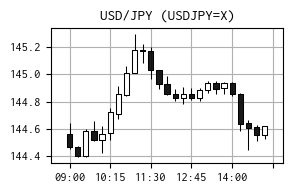

In [20]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 9

fig, ax = plt.subplots(figsize=(3, 2))
mpf.plot(
    df0,
    type='candle',
    style='default',
    datetime_format='%H:%M',
    xrotation=0,
    update_width_config=dict(candle_linewidth=0.75),
    ax=ax,
)
ax.set_ylabel(None)
ax.grid()

if "shortName" in ticker.info:
    ax.set_title(f"{ticker.info['shortName']} ({symbol})")
elif "longName" in ticker.info:
    ax.set_title(f"{ticker.info['longName']} ({symbol})")
else:
    ax.set_title(f"{symbol}")
    
plt.tight_layout()
plt.savefig(get_name_15min_chart(code, dt_first))
plt.show()